<a href="https://colab.research.google.com/github/Adarshkumar61/Deep_Learning_using_colab/blob/main/CNN_with_cifar10_Plus_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Loading the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
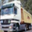

In [ ]:
x_train[1]

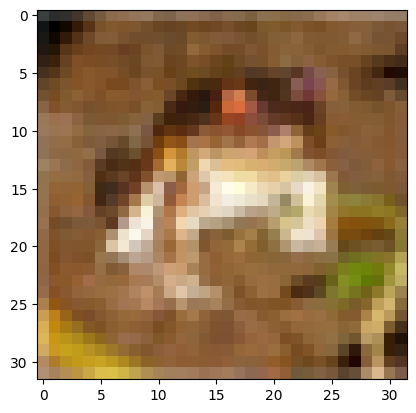

In [5]:
plt.imshow(x_train[0])

converting into 0 to 1 pixel values

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

One Hot Encoding

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Data Augmentation

In [8]:
datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [9]:
datagen.fit(x_train)

Creating a CNN model

In [10]:
model = models.Sequential()

In [11]:
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Compiling

In [12]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

Training the Model

In [13]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = 64), epochs= 15, validation_data = (x_test, y_test))

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 45ms/step - accuracy: 0.3688 - loss: 2.0344 - val_accuracy: 0.5067 - val_loss: 1.4230
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5655 - loss: 1.2232 - val_accuracy: 0.6028 - val_loss: 1.2245
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6256 - loss: 1.0606 - val_accuracy: 0.6895 - val_loss: 0.9110
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6613 - loss: 0.9648 - val_accuracy: 0.6840 - val_loss: 0.9234
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6852 - loss: 0.8986 - val_accuracy: 0.7050 - val_loss: 0.8492
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.7004 - loss: 0.8610 - val_accuracy: 0.7120 - val_loss: 0.8588
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.7093 - loss: 0.8300 - val_accuracy: 0.7378 - val_loss: 0.8010
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7279 - loss: 0.7761 - val_accurac

Model saving

In [ ]:
model.save('cnn_cifar10_model.h5')
print("Model saved!")

Model saved!


Loading the Saved model

In [ ]:
model = models.load_model('/content/cnn_cifar10_model.h5')
print('model loaded')

model loaded


creating the class names for the pictures

In [14]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [15]:
img_index = 3
actual = np.argmax(y_test[img_index])
img = x_test[img_index]

In [16]:
prediction = model.predict(np.expand_dims(img, axis=0))
predicted_class = np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Text(0.5, 1.0, 'Actual: airplane, Predicted: airplane')

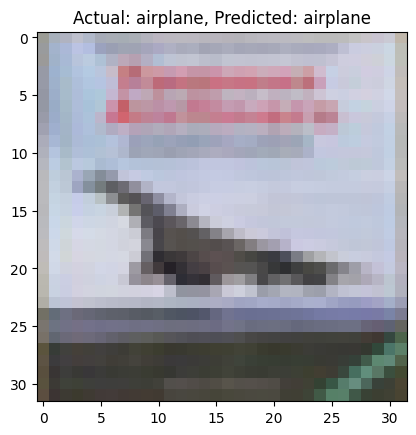

In [20]:
plt.imshow(img)
plt.title(f'Actual: {class_names[actual]}, Predicted: {class_names[predicted_class]}')

In [22]:
print(class_names[actual])

airplane


In [23]:
print(class_names[predicted_class])

airplane


In [18]:
loss_test, acc_test = model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7974 - loss: 0.6211


Accuracy Checking

In [19]:
print('acc of test data is: ', acc_test)

acc of test data is:  0.7954000234603882


In [ ]:
# HERE ACC OF THE TEST DATA IS: 79% WHICH IS GOOD
# AND OUR MODEL ALSO PREDICTED TRUE SO WE CAN SAY THIS MODEL IS GOOD FOR TESTING NEW DATA